# Supervised Learning of Actions - Logistic Regression
This note fits a logistic regression model to the sepsis data.

In [139]:
import pandas as pd
import numpy as np
from tqdm import tqdm
exportdir='/data/localhost/taufiq/export-dir/'

In [140]:
import logging
logging.basicConfig(filename='logistic-regression.log', level=logging.INFO)

In [141]:
nra = 5
nr_reps = 1
column = "Chloride"

In [142]:
MIMICtable = pd.read_csv(exportdir + '/MIMIC-1hourly-length-5.csv')
MIMICtable = MIMICtable.sort_values(by=['icustay_id', 'bloc'], ignore_index=True)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,mechvent,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance
0,1,3,7.245400e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.663900,599.999991,0.0,0.0,6267.0,0.0,9490.0,4705.0,-3223.0
1,2,3,7.245403e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.672340,339.999995,0.0,0.0,6267.0,10.0,14095.0,4605.0,-7818.0
2,3,3,7.245407e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.649789,339.999995,0.0,0.0,6277.0,20.0,18540.0,4445.0,-12243.0
3,4,3,7.245410e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.634454,339.999995,0.0,0.0,6297.0,20.0,22845.0,4305.0,-16528.0
4,5,3,7.245414e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.645714,497.499993,0.0,0.0,6317.0,20.0,27050.0,4205.0,-20713.0


In [143]:
import os
import glob
os.chdir("/data/localhost/taufiq/pulse-data-5-step")
extension = 'final_.csv'
all_filenames = [i for i in glob.glob('*{}'.format(extension))]
pulse_data = pd.concat([pd.read_csv(f) for f in all_filenames ])
pulse_data = pulse_data.rename(columns={'id': 'icustay_id'})
pulse_data['icustay_id'] = pulse_data['icustay_id'].astype(int)
pulse_data = pulse_data.reset_index(drop=True)
pulse_data = pulse_data.sort_values(by=['icustay_id', 'SimulationTime(s)'], ignore_index=True)
pulse_data['bloc'] = np.arange(len(pulse_data))%5 + 1
pulse_data.head()

,Albumin - BloodConcentration (mg/L),ArterialCarbonDioxidePressure (mmHg),ArterialOxygenPressure (mmHg),ArterialPressure (mmHg),Bicarbonate - BloodConcentration (mg/L),BloodPH (None),BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium - BloodConcentration (mg/L),CarbonDioxideSaturation (None),...,RespirationRate (1/min),SaturationAndFractionOfInspiredOxygenRatio (None),SimulationTime(s),SkinTemperature (degC),Sodium - BloodConcentration (mg/L),SystolicArterialPressure (mmHg),WhiteBloodCellCount (ct/uL),icustay_id,time,bloc
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,20.134228,4.646044,0.0,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,20.833333,4.645351,3600.0,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,20.833333,4.645612,7200.0,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,20.833333,4.645723,10800.0,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,20.833333,4.646063,14400.0,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5


In [144]:
column_mappings = {
    'Albumin - BloodConcentration (mg/L)': 'Albumin',
    'ArterialCarbonDioxidePressure (mmHg)': 'paCO2',
    'ArterialOxygenPressure (mmHg)': 'paO2',
    'Bicarbonate - BloodConcentration (mg/L)': 'HCO3',
    'BloodPH (None)': 'Arterial_pH',
    'Calcium - BloodConcentration (mg/L)': 'Calcium',
    'Chloride - BloodConcentration (mg/L)': 'Chloride',
    'Creatinine - BloodConcentration (mg/L)': 'Creatinine',
    'DiastolicArterialPressure (mmHg)': 'DiaBP',
    'Glucose - BloodConcentration (mg/L)': 'Glucose',
    'Lactate - BloodConcentration (mg/L)': 'Arterial_lactate',
    'MeanArterialPressure (mmHg)': 'MeanBP',
    'Potassium - BloodConcentration (mg/L)': 'Potassium',
    'RespirationRate (1/min)': 'RR',
    'SkinTemperature (degC)': 'Temp_C',
    'Sodium - BloodConcentration (mg/L)': 'Sodium',
    'SystolicArterialPressure (mmHg)': 'SysBP',
    'WhiteBloodCellCount (ct/uL)': 'WBC_count',
    'HeartRate (1/min)': 'HR'
}

pulse_rename = {}

for k, v in column_mappings.items():
    pulse_rename.update({k: f"{v}"})

pulse_data = pulse_data.rename(columns=pulse_rename)

pulse_data = pulse_data.merge(MIMICtable[['gender', 'age', 'Weight_kg', 'icustay_id', 'bloc']], left_on=['icustay_id', 'bloc'], right_on=['icustay_id', 'bloc'])
pulse_data = pulse_data.rename(columns={'age': 'age_raw', column: f'{column}_raw'})

pulse_data.head()

,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium,CarbonDioxideSaturation (None),...,Temp_C,Sodium,SysBP,WBC_count,icustay_id,time,bloc,gender,age_raw,Weight_kg
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1,0.0,17639.826435,66.300000
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2,0.0,17639.826435,78.699997
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3,0.0,17639.826435,78.699997
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4,0.0,17639.826435,78.699997
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5,0.0,17639.826435,78.699997


## Create Actions


In [145]:
from sklearn.cluster import KMeans
from scipy.stats import rankdata

logging.info('Creating action bins')
nact = nra**2
input_1hourly_nonzero = MIMICtable.loc[MIMICtable['input_1hourly']>0, 'input_1hourly']
iol_ranked = rankdata(input_1hourly_nonzero)/len(input_1hourly_nonzero) # excludes zero fluid (will be action 1)
iof = np.floor((iol_ranked + 0.2499999999)*4) # converts iv volume in 4 actions
io = np.ones(len(MIMICtable)) # array of ones, by default
io[MIMICtable['input_1hourly']>0] = iof + 1 # where more than zero fluid given: save actual action
vc = MIMICtable['max_dose_vaso'].copy()
vc_nonzero = MIMICtable.loc[MIMICtable['max_dose_vaso']!=0, 'max_dose_vaso']
vc_ranked = rankdata(vc_nonzero)/len(vc_nonzero)
vcf = np.floor((vc_ranked + 0.2499999999)*4) # converts to 4 bins
vcf[vcf==0] = 1
vc[vc!=0] = vcf + 1
vc[vc==0] = 1
# median dose of drug in all bins
ma1 = [MIMICtable.loc[io==1, 'input_1hourly'].median(), MIMICtable.loc[io==2, 'input_1hourly'].median(), MIMICtable.loc[io==3, 'input_1hourly'].median(), MIMICtable.loc[io==4, 'input_1hourly'].median(), MIMICtable.loc[io==5, 'input_1hourly'].median()]
ma2 = [MIMICtable.loc[vc==1, 'max_dose_vaso'].median(), MIMICtable.loc[vc==2, 'max_dose_vaso'].median(), MIMICtable.loc[vc==3, 'max_dose_vaso'].median(), MIMICtable.loc[vc==4, 'max_dose_vaso'].median(), MIMICtable.loc[vc==5, 'max_dose_vaso'].median()]
med = pd.DataFrame(data={'IV':io, 'VC': vc})
med = med.astype({'IV': 'int32', 'VC': 'int32'})
uniqueValues = med.drop_duplicates().reset_index(drop=True)
uniqueValueDoses = pd.DataFrame()
for index, row in uniqueValues.iterrows():
    uniqueValueDoses.at[index, 'IV'], uniqueValueDoses.at[index, 'VC'] = ma1[row['IV']-1], ma2[row['VC']-1]

actionbloc = pd.DataFrame()
for index, row in med.iterrows():
    actionbloc.at[index, 'action_bloc'] = uniqueValues.loc[(uniqueValues['IV'] == row['IV']) & (uniqueValues['VC'] == row['VC'])].index.values[0]+1
actionbloc = actionbloc.astype({'action_bloc':'int32'})

logging.info('Action bins created')

In [146]:
uniqueValues.head(6)

,IV,VC
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,2,3


In [147]:
ma1

[0.0, 10.0, 23.0165, 97.19701666666666, 310.0]

In [148]:
ma2

[0.0, 0.04, 0.1, 0.225, 0.562]

# Create Age, Weight, Column bins

In [149]:
age_ranked = rankdata(MIMICtable['age'])/len(MIMICtable)
age_bins = np.floor((age_ranked + 0.2499999999)*4)
median_ages = [MIMICtable.loc[age_bins==1, 'age'].median(), MIMICtable.loc[age_bins==2, 'age'].median(), MIMICtable.loc[age_bins==3, 'age'].median(), MIMICtable.loc[age_bins==4, 'age'].median()]

In [150]:
np.array(median_ages)/365.0

array([45.9288523 , 61.18113114, 72.75331846, 84.12567374])

In [151]:
weight_ranked = rankdata(MIMICtable['Weight_kg'])/len(MIMICtable)
weight_bins = np.floor((weight_ranked + 0.2499999999)*4)
median_weight = [MIMICtable.loc[weight_bins==1, 'Weight_kg'].median(), MIMICtable.loc[weight_bins==2, 'Weight_kg'].median(), MIMICtable.loc[weight_bins==3, 'Weight_kg'].median(), MIMICtable.loc[weight_bins==4, 'Weight_kg'].median()]
median_weight

[58.0, 72.30000305175781, 85.0, 105.5]

In [152]:
col_ranked = rankdata(MIMICtable[column])/len(MIMICtable)
col_bins = np.floor((col_ranked + 0.1999999999)*5)
median_col = [MIMICtable.loc[col_bins==1, column].median(), MIMICtable.loc[col_bins==2, column].median(), MIMICtable.loc[col_bins==3, column].median(), MIMICtable.loc[col_bins==4, column].median(), MIMICtable.loc[col_bins==5, column].median()]
median_col

[3403.2000000000003, 3580.4500000000003, 3686.8, 3793.15, 3934.95]

In [153]:
MIMICtable = MIMICtable.rename(columns={"age": "age_raw", column: f'{column}_raw'})
MIMICtable['age'] = age_bins
MIMICtable['weight'] = weight_bins
MIMICtable[column] = col_bins
pulse_data = pulse_data.merge(MIMICtable[['age', 'icustay_id', 'bloc', 'weight', column]], left_on=['icustay_id', 'bloc'], right_on=['icustay_id', 'bloc'])
pulse_data.head()

,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium,CarbonDioxideSaturation (None),...,WBC_count,icustay_id,time,bloc,gender,age_raw,Weight_kg,age,weight,Chloride
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,7000.0,3,7.245400e+09,1,0.0,17639.826435,66.300000,1.0,2.0,2.0
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,7000.0,3,7.245403e+09,2,0.0,17639.826435,78.699997,1.0,3.0,4.0
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,7000.0,3,7.245407e+09,3,0.0,17639.826435,78.699997,1.0,3.0,5.0
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,7000.0,3,7.245410e+09,4,0.0,17639.826435,78.699997,1.0,3.0,4.0
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,7000.0,3,7.245414e+09,5,0.0,17639.826435,78.699997,1.0,3.0,3.0


In [154]:
trajectories = pd.DataFrame()
trajectories['t'] = np.arange(len(MIMICtable))%5
trajectories['icustay_id'] = MIMICtable['icustay_id']
trajectories['gender'] = MIMICtable['gender']
trajectories['age'] = MIMICtable['age']
trajectories['weight'] = MIMICtable['weight']
trajectories[column] = MIMICtable[column]
trajectories['A_t'] = actionbloc['action_bloc']
trajectories = trajectories[trajectories['t']!=4]

In [155]:
trajectories.head()

,t,icustay_id,gender,age,weight,Chloride,A_t
0,0,3,0.0,1.0,2.0,2.0,1
1,1,3,0.0,1.0,3.0,4.0,2
2,2,3,0.0,1.0,3.0,5.0,3
3,3,3,0.0,1.0,3.0,4.0,3
5,0,14,0.0,4.0,2.0,5.0,4


In [156]:
pulse_trajecs = pd.DataFrame()
pulse_trajecs['t'] = np.arange(len(pulse_data))%5
pulse_trajecs['icustay_id'] = pulse_data['icustay_id']
pulse_trajecs = pulse_trajecs[pulse_trajecs['t']!=4]
pulse_trajecs = pulse_trajecs.merge(trajectories[['t','icustay_id', 'A_t', 'gender', 'age', 'weight', column]], left_on=['icustay_id', 't'], right_on=['icustay_id', 't'])
pulse_trajecs.head()

,t,icustay_id,A_t,gender,age,weight,Chloride
0,0,3,1,0.0,1.0,2.0,2.0
1,1,3,2,0.0,1.0,3.0,4.0
2,2,3,3,0.0,1.0,3.0,5.0
3,3,3,3,0.0,1.0,3.0,4.0
4,0,14,4,0.0,4.0,2.0,5.0


In [157]:
trajec_actions = pd.DataFrame()
for index, row in trajectories.iterrows():
    if row['t'] == 0 and index > 0:
        trajec_actions = trajec_actions.append({'actions': actions, 'gender': gender, 'age': age, 'weight': weight, column: col_traj}, ignore_index=True)
        actions = [row['A_t']]
        col_traj = [row[column]]
        gender = row['gender']
        age = row['age']
        weight = row['weight']
    elif index == 0:
        age = row['age']
        actions = [row['A_t']]
        col_traj = [row[column]]
        gender = row['gender']
        weight = row['weight']        
    else:
        age = row['age']
        actions.append(row['A_t'])
        col_traj.append(row[column])
        gender = row['gender']
        weight = row['weight']

trajec_actions = trajec_actions.append({'actions': actions, 'gender': gender, 'age': age, 'weight': weight, column: col_traj}, ignore_index=True)

In [158]:
pulse_trajec_actions = pd.DataFrame()
for index, row in pulse_trajecs.iterrows():
    if row['t'] == 0 and index > 0:
        pulse_trajec_actions = pulse_trajec_actions.append({'actions': actions, 'gender': gender, 'age': age, 'weight': weight, column: col_traj}, ignore_index=True)
        age = row['age']
        actions = [row['A_t']]
        col_traj = [row[column]]
        gender = row['gender']
        weight = row['weight']
    elif index == 0:
        age = row['age']
        actions = [row['A_t']]
        col_traj = [row[column]]
        gender = row['gender']
        weight = row['weight']
    else:
        age = row['age']
        actions.append(row['A_t'])
        col_traj.append(row[column])
        gender = row['gender']
        weight = row['weight']

pulse_trajec_actions = pulse_trajec_actions.append({'actions': actions, 'gender': gender, 'age': age, 'weight': weight, column: col_traj}, ignore_index=True)

In [159]:
pulse_trajec_actions['icustay_id'] = pulse_trajecs['icustay_id'].unique()
pulse_trajec_actions.head()

,Chloride,actions,age,gender,weight,icustay_id
0,"[2.0, 4.0, 5.0, 4.0]","[1.0, 2.0, 3.0, 3.0]",1.0,0.0,3.0,3
1,"[5.0, 5.0, 5.0, 5.0]","[4.0, 5.0, 4.0, 3.0]",4.0,0.0,2.0,14
2,"[1.0, 2.0, 4.0, 4.0]","[6.0, 7.0, 7.0, 8.0]",4.0,1.0,1.0,75
3,"[1.0, 2.0, 2.0, 2.0]","[1.0, 1.0, 1.0, 1.0]",2.0,0.0,1.0,85
4,"[5.0, 5.0, 5.0, 5.0]","[3.0, 3.0, 3.0, 3.0]",2.0,0.0,2.0,87


In [160]:
def find_elements(series, element):
    return series.apply(lambda x: x == element)

def find_elements_starting_with(series, element):
    return series.apply(lambda x: x[:len(element)] == element)

def find_elements_containing(series, element):
    return series.apply(lambda x: element in x)

In [161]:
for index, row in trajec_actions.iterrows():
    prob_a_den = 0
    gamma = []
    for i in range(len(row['actions'])):
        prob_a_num = (find_elements(trajec_actions['gender'],row['gender']) & find_elements(trajec_actions['age'],row['age']) & find_elements_starting_with(trajec_actions[column],row[column][:i+1]) & find_elements_starting_with(trajec_actions['actions'],row['actions'][:i+1])).sum()
        if i == 0:
            prob_a_den += (find_elements(trajec_actions['gender'],row['gender']) & find_elements(trajec_actions['age'],row['age']) & find_elements_starting_with(trajec_actions[column],row[column][:i+1])).sum()
        else:
            prob_a_den += ((find_elements_starting_with(trajec_actions[column],row[column][:i+1])) & (find_elements(trajec_actions['gender'],row['gender']))&(find_elements(trajec_actions['age'],row['age']))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum() -\
            ((find_elements_starting_with(trajec_actions[column],row[column][:i])) & (find_elements(trajec_actions['gender'],row['gender']))&(find_elements(trajec_actions['age'],row['age']))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum()
        gamma.append(prob_a_num/prob_a_den)
        trajec_actions.at[index, f'prob_a_{i}'] = prob_a_num/prob_a_den
    trajec_actions.at[index, 'prob_a'] = prob_a_num/prob_a_den

In [162]:
icustayids = MIMICtable['icustay_id'].unique()
trajec_actions['icustay_id'] = icustayids

In [163]:
trajec_actions.head()

,Chloride,actions,age,gender,weight,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,icustay_id
0,"[2.0, 4.0, 5.0, 4.0]","[1.0, 2.0, 3.0, 3.0]",1.0,0.0,3.0,0.457447,0.009346,0.009346,0.009346,0.009346,3
1,"[5.0, 5.0, 5.0, 5.0]","[4.0, 5.0, 4.0, 3.0]",4.0,0.0,2.0,0.074074,0.007692,0.007692,0.007692,0.007692,14
2,"[1.0, 2.0, 4.0, 4.0]","[6.0, 7.0, 7.0, 8.0]",4.0,1.0,1.0,0.013333,0.006711,0.006711,0.006711,0.006711,75
3,"[1.0, 2.0, 2.0, 2.0]","[1.0, 1.0, 1.0, 1.0]",2.0,0.0,1.0,0.473684,0.126214,0.090909,0.061224,0.061224,85
4,"[5.0, 5.0, 5.0, 5.0]","[3.0, 3.0, 3.0, 3.0]",2.0,0.0,2.0,0.167883,0.086614,0.032787,0.024793,0.024793,87


In [164]:
mimic_data_last_time = MIMICtable[MIMICtable['bloc'] == 5].drop(columns=column)
trajec_actions = trajec_actions.merge(mimic_data_last_time, left_on=['icustay_id', 'gender', 'age'], right_on=['icustay_id', 'gender', 'age'])



In [165]:
trajec_actions.head()

,Chloride,actions,age,gender,weight_x,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,weight_y
0,"[2.0, 4.0, 5.0, 4.0]","[1.0, 2.0, 3.0, 3.0]",1.0,0.0,3.0,0.457447,0.009346,0.009346,0.009346,0.009346,...,0.645714,497.499993,0.000,0.00,6317.000000,20.000000,27050.0,4205.0,-20713.000000,3.0
1,"[5.0, 5.0, 5.0, 5.0]","[4.0, 5.0, 4.0, 3.0]",4.0,0.0,2.0,0.074074,0.007692,0.007692,0.007692,0.007692,...,0.554667,447.499993,0.000,0.00,1300.000000,80.000000,3399.0,464.0,-2019.000000,2.0
2,"[1.0, 2.0, 4.0, 4.0]","[6.0, 7.0, 7.0, 8.0]",4.0,1.0,1.0,0.013333,0.006711,0.006711,0.006711,0.006711,...,0.668168,254.482759,0.255,0.27,157.317800,76.038433,30960.0,5055.0,-30726.643767,1.0
3,"[1.0, 2.0, 2.0, 2.0]","[1.0, 1.0, 1.0, 1.0]",2.0,0.0,1.0,0.473684,0.126214,0.090909,0.061224,0.061224,...,0.603550,500.000000,0.000,0.00,0.000000,0.000000,39438.0,6573.0,-39438.000000,1.0
4,"[5.0, 5.0, 5.0, 5.0]","[3.0, 3.0, 3.0, 3.0]",2.0,0.0,2.0,0.167883,0.086614,0.032787,0.024793,0.024793,...,0.668889,330.000000,0.000,0.00,5817.717667,25.479000,20060.0,3225.0,-14216.803333,2.0


In [166]:
pulse_data_last_time = pulse_data[pulse_data['bloc'] == 5].drop(columns=column)
pulse_trajec_actions = pulse_trajec_actions.merge(pulse_data_last_time, left_on=['icustay_id', 'gender', 'age', 'weight'], right_on=['icustay_id', 'gender', 'age', 'weight'])


In [167]:
pulse_trajec_actions.head()

,Chloride,actions,age,gender,weight,icustay_id,Albumin,paCO2,paO2,ArterialPressure (mmHg),...,SaturationAndFractionOfInspiredOxygenRatio (None),SimulationTime(s),Temp_C,Sodium,SysBP,WBC_count,time,bloc,age_raw,Weight_kg
0,"[2.0, 4.0, 5.0, 4.0]","[1.0, 2.0, 3.0, 3.0]",1.0,0.0,3.0,3,33088.536551,40.305062,92.327881,71.410965,...,4.646063,14400.0,32.834440,3277.230920,126.459716,7000.0,7.245414e+09,5,17639.826435,78.699997
1,"[5.0, 5.0, 5.0, 5.0]","[4.0, 5.0, 4.0, 3.0]",4.0,0.0,2.0,14,27762.117998,39.349305,93.040334,124.141909,...,4.649171,14400.0,32.982227,3281.155130,134.524102,7000.0,4.264284e+09,5,30946.970000,71.800000
2,"[1.0, 2.0, 4.0, 4.0]","[6.0, 7.0, 7.0, 8.0]",4.0,1.0,1.0,75,31398.788149,39.560312,92.632462,73.499676,...,4.649925,14400.0,33.843513,3272.871578,106.843624,7000.0,5.987192e+09,5,30550.009259,58.100000
3,"[1.0, 2.0, 2.0, 2.0]","[1.0, 1.0, 1.0, 1.0]",2.0,0.0,1.0,85,34178.434836,39.565089,92.889440,98.439060,...,4.647026,14400.0,33.396193,3278.113703,121.901447,7000.0,4.175249e+09,5,20450.681678,61.000000
4,"[5.0, 5.0, 5.0, 5.0]","[3.0, 3.0, 3.0, 3.0]",2.0,0.0,2.0,87,32291.338009,40.199505,93.184559,57.127454,...,4.649792,14400.0,33.008978,3277.371551,115.885281,7000.0,7.153045e+09,5,23495.472095,67.000000


In [168]:
def bounds(col, gender, age, column_v, actions):
    global trajec_actions
    exp_y = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements(trajec_actions[col], column_v) & find_elements(trajec_actions['actions'], actions), f'{col}_raw'].mean()
    prob_a = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements(trajec_actions[col], column_v) & find_elements(trajec_actions['actions'], actions), 'prob_a'].values[0]
    max_y = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements_containing(trajec_actions[col], max(column_v)), f'{col}_raw'].max()
    min_y = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements_containing(trajec_actions[col], min(column_v)), f'{col}_raw'].min()
    return prob_a*exp_y + (1-prob_a)*min_y, prob_a*exp_y + (1-prob_a)*max_y
    

In [169]:
def exp_potential_outcome(col, gender, age, column_v, actions):
    global pulse_trajec_actions
    exp_y = pulse_trajec_actions.loc[find_elements(pulse_trajec_actions['gender'], gender) & find_elements(pulse_trajec_actions['age'], age) & find_elements(pulse_trajec_actions[col], column_v) & find_elements(pulse_trajec_actions['actions'], actions), f'{col}_raw'].mean()
    return exp_y

In [170]:
def in_bound(col):
    global trajec_actions, pulse_trajec_actions
    inbounds = []
    for index, row in trajec_actions.iterrows():
        lb, ub = bounds(col, row['gender'], row['age'], row[column], row['actions'])
        exp_y = exp_potential_outcome(col, row['gender'], row['age'], row[column], row['actions'])
        if exp_y == float('NaN'):
            inbounds.append(1)
        else:
            in_bound = int((exp_y >= lb) and (exp_y <= ub))
            inbounds.append(in_bound)
    return inbounds            
        

In [171]:
inbounds = in_bound(column)

In [172]:
np.sum(inbounds)/len(inbounds)

0.6600291403593977

In [173]:
from sklearn.utils import resample
def bootstrap_distribution(col, gender, age, action, column_v, n_iter=100):
    global trajec_actions, pulse_trajec_actions
    df = pd.DataFrame()
    max_y = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements_containing(trajec_actions[col], max(column_v)), f'{col}_raw'].max()
    min_y = trajec_actions.loc[find_elements(trajec_actions['gender'], gender) & find_elements(trajec_actions['age'], age) & find_elements_containing(trajec_actions[col], min(column_v)), f'{col}_raw'].min()
    sim_filtered = pulse_trajec_actions[find_elements_starting_with(pulse_trajec_actions[col], column_v) & find_elements(pulse_trajec_actions['gender'], gender) & find_elements(pulse_trajec_actions['age'], age) & find_elements_starting_with(pulse_trajec_actions['actions'], action)].copy()
    real_filtered = trajec_actions[find_elements(trajec_actions[col], column_v) & find_elements(trajec_actions['gender'], gender) & find_elements(pulse_trajec_actions['age'], age) & find_elements_starting_with(trajec_actions['actions'], action)].copy()
    if len(real_filtered) > 1 and len(sim_filtered) > 1:
        for i in range(n_iter):
            real_train = resample(real_filtered, n_samples=len(real_filtered))
            exp_y = real_train[f'{col}_raw'].mean()
            prob = real_train['prob_a'].max()
            sim_train = resample(sim_filtered, n_samples=len(sim_filtered))
            exp_y_sim = sim_train[f'{col}_raw'].mean()
            df = df.append({'Exp_y': exp_y, 'UB': prob*exp_y + (1-prob)*max_y, 'LB': prob*exp_y + (1-prob)*min_y, 'Sim_exp_y': exp_y_sim, 'max_y':max_y, 'min_y': min_y}, ignore_index=True)
        return df
    return None


In [174]:
from sklearn.utils import resample
def bootstrap_distribution_(col, gender, age, action, column_v, n_iter=100, i=3):
    global trajec_actions, pulse_trajec_actions
    pulse = pulse_trajec_actions[['actions', 'gender', 'age', 'icustay_id', col]].merge(pulse_data[pulse_data['bloc'] == i+2].drop(columns=col))
    obs_data = trajec_actions[['actions', 'gender', 'age', 'icustay_id', col, f'prob_a_{i}']].merge(MIMICtable[MIMICtable['bloc'] == i+2].drop(columns=col))
    df = pd.DataFrame()
    max_y = obs_data.loc[find_elements(obs_data['gender'], gender) & find_elements(obs_data['age'], age) & find_elements_containing(obs_data[col], max(column_v)), f'{col}_raw'].max()
    min_y = obs_data.loc[find_elements(obs_data['gender'], gender) & find_elements(obs_data['age'], age) & find_elements_containing(obs_data[col], min(column_v)), f'{col}_raw'].min()
    sim_filtered = pulse[find_elements(pulse['gender'], gender) & find_elements(pulse['age'], age) & find_elements(pulse[column], column_v) & find_elements_starting_with(pulse['actions'], action)].copy()
    real_filtered = obs_data[find_elements(obs_data['gender'], gender) & find_elements(obs_data['age'], age) & find_elements_starting_with(obs_data['actions'], action)].copy()
    if len(real_filtered) > 1 and len(sim_filtered) > 1:
        for j in range(n_iter):
            real_train = resample(real_filtered, n_samples=len(real_filtered))
            exp_y = real_train[f'{col}_raw'].mean()
            prob = real_train[f'prob_a_{i}'].max()
            sim_train = resample(sim_filtered, n_samples=len(sim_filtered))
            exp_y_sim = sim_train[f'{col}_raw'].mean()
            df = df.append({'Exp_y': exp_y, 'UB': prob*exp_y + (1-prob)*max_y, 'LB': prob*exp_y + (1-prob)*min_y, 'Sim_exp_y': exp_y_sim, 'max_y':max_y, 'min_y': min_y}, ignore_index=True)
        return df
    return None

In [175]:
import matplotlib.pyplot as plt
def plot_bootstrapp_distributions(col, gender, age, action, column_v):
    df = bootstrap_distribution_(col, gender, age, action, column_v)
    plt.hist(df['Exp_y'], bins=10, color='grey', label='Exp(y)')
    ub_lim = df['UB'].mean() + 1.96*df['UB'].std()
    lb_lim = df['LB'].mean() - 1.96*df['LB'].std()
    plt.axvspan(lb_lim, ub_lim, alpha=0.1, color='purple')
    plt.hist(df['Sim_exp_y'], bins=10, color='pink', label='Simulated Exp(y)')
    plt.legend()
    plt.show()

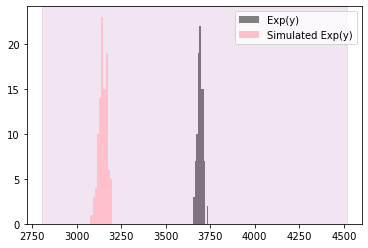

In [176]:
plot_bootstrapp_distributions(column, 0, 4, [1, 1, 1, 1], [1, 1, 1, 1])

In [177]:
import matplotlib.pyplot as plt

column_names_unit = {
    'Albumin': 'Albumin Blood Concentration (mg/L)',
    'paCO2': 'Arterial $CO_2$ Pressure (mmHg)',
    'paO2': 'Arterial $O_2$ Pressure (mmHg)',
    'HCO3': 'Bicarbonate Blood Concentration (mg/L)',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration (mg/L)',
    'Calcium': 'Calcium Blood Concentration (mg/L)',
    'Chloride': 'Chloride Blood Concentration (mg/L)',
    'Creatinine': 'Creatinine Blood Concentration (mg/L)',
    'DiaBP': 'Diastolic Arterial Pressure (mmHg)',
    'SysBP': 'Systolic Arterial Pressure (mmHg)',
    'Glucose': 'Glucose Blood Concentration (mg/L)',
    'Lactate': 'Lactate Blood Concentration (mg/L)',
    'MeanBP': 'Mean Arterial Pressure (mmHg)',
    'Potassium': 'Potassium Blood Concentration (mg/L)',
    'RR': 'Respiration Rate (1/min)',
    'Temp_C': 'Skin Temperature (C)',
    'Sodium': 'Sodium Blood Concentration (mg/L)',
    'WBC_count': 'White Blood Cell Count (ct/uL)',
    'HR': 'Heart Rate (1/min)'
}

In [178]:
def plot_bounds_bootstrap(col, gender, age, action, column_v):
    global trajec_actions, pulse_trajec_actions, column_names_unit
    lb = []
    ub = []
    sim_mean, sim_lb, sim_ub = [], [], []
    max_vals, min_vals = [], []
    probs = []
    for i in range(len(actions)):
        df = bootstrap_distribution_(col, gender, age, action, column_v, n_iter=100, i=i)
        lb.append(df['LB'].mean() - 1.96*df['LB'].std())
        ub.append(df['UB'].mean() + 1.96*df['UB'].std())
        sim_ub.append(df['Sim_exp_y'].mean() + 1.96*df['Sim_exp_y'].std())
        sim_lb.append(df['Sim_exp_y'].mean() - 1.96*df['Sim_exp_y'].std())
        sim_mean.append(df['Sim_exp_y'].mean())
        max_vals.append(df['max_y'].max())
        min_vals.append(df['min_y'].min())
    plt.figure(figsize=(12,8)),
    plt.plot(range(1,5), sim_mean, '-', color='gray')
    plt.xlabel('Time (hr)', fontsize=13)
    plt.ylabel(column_names_unit[col], fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.fill_between(range(1,5), sim_ub, sim_lb, color='navy', alpha=0.4, label='Simulated')
    plt.fill_between(range(1,5), lb, ub, color='pink', alpha=0.4, label='Bareinboim bounds')
    plt.fill_between(range(1,5), min_vals, max_vals, color='pink', alpha=0.5, label='Max-min bounds')
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.show()

In [179]:
import scipy.stats as st

def rejected_hypotheses_bootstrap(col):
    state_actions = trajec_actions[['gender', 'age', 'actions', col]].copy()
    state_actions.loc[:,'a'] = state_actions['actions'].apply(tuple)
    state_actions.loc[:,'s'] = state_actions[col].apply(tuple)
    state_actions = state_actions.drop_duplicates(['gender', 'age', 'a', 's'])
    total_hypotheses = len(state_actions)
    p_values = pd.DataFrame()
    for index, row in state_actions.iterrows():
        df = bootstrap_distribution(col, row['gender'], row['age'], row['actions'], row[col])
        if df is not None:
            sigma_ub = (df['UB']-df['Sim_exp_y']).var()
            exp_ub = (df['UB']-df['Sim_exp_y']).mean()
            p_ub = st.norm.cdf(exp_ub/np.sqrt(sigma_ub))
            sigma_lb = (df['Sim_exp_y']-df['LB']).var()
            exp_lb = (df['Sim_exp_y']-df['LB']).mean()
            p_lb = st.norm.cdf(exp_lb/np.sqrt(sigma_lb))
            p_values = p_values.append({'gender': row['gender'], 'age': row['age'], 'actions': row['actions'], col: row[col], 'p_lb': p_lb, 'p_ub': p_ub}, ignore_index=True)
    rej_hyps = p_values[(p_values['p_lb']<0.05/total_hypotheses) ^ (p_values['p_ub']<0.05/total_hypotheses)].copy()
    for index, row in rej_hyps.iterrows():
        rej_hyps.loc[index, 'n_real'] = (find_elements(trajec_actions['gender'], row['gender']) & find_elements(trajec_actions['age'], row['age']) & find_elements(trajec_actions['actions'], row['actions']) & find_elements(trajec_actions[col], row[col])).sum()
        rej_hyps.loc[index, 'n_sim'] = (find_elements(pulse_trajec_actions['gender'], row['gender']) & find_elements(pulse_trajec_actions['age'], row['age']) & find_elements(pulse_trajec_actions['actions'], row['actions']) & find_elements(pulse_trajec_actions[col], row[col])).sum()
    return len(rej_hyps), p_values, rej_hyps


In [180]:
_,_, rej = rejected_hypotheses_bootstrap(column)

In [181]:
rej

,Chloride,actions,age,gender,p_lb,p_ub,n_real,n_sim
12,"[4.0, 4.0, 4.0, 4.0]","[1.0, 1.0, 1.0, 1.0]",1.0,1.0,7.006668e-52,1.0,12.0,4.0
46,"[2.0, 3.0, 3.0, 3.0]","[1.0, 1.0, 1.0, 1.0]",4.0,1.0,2.755624e-06,1.0,4.0,2.0


In [182]:
rejected_hyp_bootstrap = pd.DataFrame()
for key, value in tqdm(column_mappings.items()):
    rej_hyps, _, _ = rejected_hypotheses_bootstrap(value)
    rejected_hyp_bootstrap = rejected_hyp_bootstrap.append({'Outcome $Y$': value, '# rejected hypotheses': rej_hyps}, ignore_index=True)

  0%|          | 0/19 [00:00<?, ?it/s]


TypeError: 'float' object is not iterable

In [ ]:
column_names = {
    'Albumin': 'Albumin Blood Concentration',
    'paCO2': 'Arterial $CO_2$ Pressure',
    'paO2': 'Arterial $O_2$ Pressure',
    'HCO3': 'Bicarbonate Blood Concentration',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration',
    'Calcium': 'Calcium Blood Concentration',
    'Chloride': 'Chloride Blood Concentration',
    'Creatinine': 'Creatinine Blood Concentration',
    'DiaBP': 'Diastolic Arterial Pressure',
    'SysBP': 'Systolic Arterial Pressure',
    'Glucose': 'Glucose Blood Concentration',
    'Lactate': 'Lactate Blood Concentration',
    'MeanBP': 'Mean Arterial Pressure',
    'Potassium': 'Potassium Blood Concentration',
    'RR': 'Respiration Rate',
    'Temp_C': 'Body Temperature',
    'Skin Temperature': 'Body Temperature',
    'Sodium': 'Sodium Blood Concentration',
    'WBC_count': 'White Blood Cell Count',
    'HR': 'Heart Rate'
}

In [ ]:
for index, row in rejected_hyp_bootstrap.iterrows():
    if row['Outcome $Y$'] in column_names:
        rejected_hyp_bootstrap.at[index, 'Outcome $Y$'] = column_names[row['Outcome $Y$']]

In [ ]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8,8))

rejected_hyp_bootstrap.sort_values('# rejected hypotheses', ascending=False, inplace=True)
ax.barh(rejected_hyp_bootstrap['Outcome $Y$'],rejected_hyp_bootstrap['# rejected hypotheses'],  color='#96b9d6')
y = rejected_hyp_bootstrap['# rejected hypotheses']
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), fontsize=12)

plt.title('No of rejected hypotheses (bootstrap)')
plt.ylabel('Outcome $Y$')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.style.use('ggplot')
plt.xlim([0,135])
plt.show()

In [ ]:
_, p_values, rej_hyps = rejected_hypotheses_bootstrap('Chloride')

In [ ]:
rej_hyps

In [ ]:
plot_bounds_bootstrap('Chloride', 0, 2, 1 , [1.0, 1.0, 1.0, 1.0])

In [ ]:
_, p_values, rej_hyps = rejected_hypotheses_bootstrap('Calcium')

In [ ]:
rej_hyps

In [ ]:
plot_bounds_bootstrap('Calcium', 1, 3, 2, [1, 1, 1, 1])